In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [97]:
fs_data = pd.read_csv('../output/foodstores_data_init.csv')

In [98]:
df1 = pd.read_csv('../output/0_housholds_data_dynamic.csv')
df1['period'] = 1
df2 = pd.read_csv('../output/1_housholds_data_dynamic.csv')
df2['period'] = 2
df3 = pd.read_csv('../output/2_housholds_data_dynamic.csv')
df3['period'] = 3
df4 = pd.read_csv('../output/3_housholds_data_dynamic.csv')
df4['period'] = 4
df5 = pd.read_csv('../output/4_housholds_data_dynamic.csv')
df5['period'] = 5
df6 = pd.read_csv('../output/5_housholds_data_dynamic.csv')
df6['period'] = 6
df7 = pd.read_csv('../output/6_housholds_data_dynamic.csv')
df7['period'] = 7
df8 = pd.read_csv('../output/7_housholds_data_dynamic.csv')
df8['period'] = 8
df9 = pd.read_csv('../output/8_housholds_data_dynamic.csv')
df9['period'] = 9
df10 = pd.read_csv('../output/9_housholds_data_dynamic.csv')
df10['period'] = 10
df11 = pd.read_csv('../output/10_housholds_data_dynamic.csv')
df11['period'] = 11
df12 = pd.read_csv('../output/11_housholds_data_dynamic.csv')
df12['period'] = 12


df_list = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]


In [99]:
df_final = pd.concat(df_list)
df_final.head(5)

,x,y,index1,income,high_income,hh_propensity,a,utility,max_fs_prop,healthy_choice,unhealthy_choice,period
0,136387.5,459037.5,0,42.312275,1,1.014934,0.000098,24.598422,1.821824,1.0,0.0,1
1,136787.5,459012.5,1,34.591298,0,1.145257,-0.000013,2.080657,1.821824,1.0,0.0,1
2,136812.5,459012.5,2,62.207712,1,-0.101962,-0.000047,2.111947,-1.539681,0.0,1.0,1
3,136512.5,458987.5,3,35.379079,0,-1.046754,0.000006,1.891844,-1.539681,0.0,1.0,1
4,136487.5,458962.5,4,38.996098,1,-0.222421,-0.000023,1.874340,-1.539681,0.0,1.0,1


In [100]:
df_final.replace([np.inf, -np.inf], np.nan, inplace=True)

In [101]:
df = df_final.copy()

(array([  60.,  216.,  600., 1704., 2784., 2892., 2112.,  852.,  276.,
          60.]),
 array([ 5.06084552, 11.49999831, 17.9391511 , 24.37830389, 30.81745668,
        37.25660947, 43.69576226, 50.13491505, 56.57406783, 63.01322062,
        69.45237341]),
 <BarContainer object of 10 artists>)

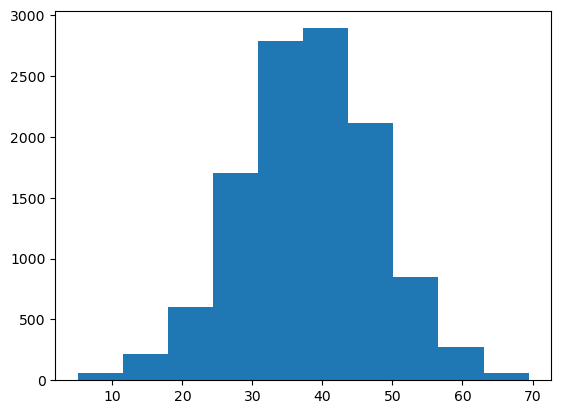

In [102]:
plt.hist(df['income'])

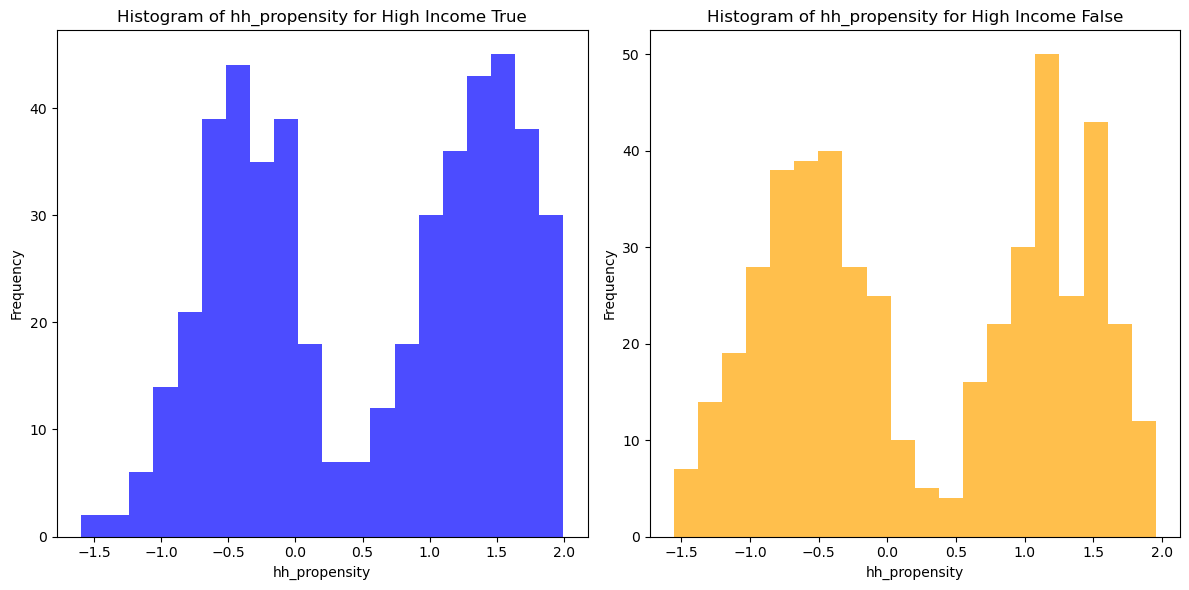

In [103]:
# Separate data into two DataFrames based on 'high_income'
high_income_true_df = df.loc[(df['high_income'] == 1) & (df['period'] == 1)]
high_income_false_df = df.loc[(df['high_income'] == 0) & (df['period'] == 1)]

# Plotting histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(high_income_true_df['hh_propensity'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of hh_propensity for High Income True')
plt.xlabel('hh_propensity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(high_income_false_df['hh_propensity'], bins=20, color='orange', alpha=0.7)
plt.title('Histogram of hh_propensity for High Income False')
plt.xlabel('hh_propensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [104]:
df_final['healthy_choice_share'] = df_final['healthy_choice'] / 12
df_final['unhealthy_choice_share'] = df_final['unhealthy_choice'] / 12

In [105]:
df.describe()

,x,y,index1,income,high_income,hh_propensity,a,utility,max_fs_prop,healthy_choice,unhealthy_choice,period
count,11556.000000,11556.000000,11556.000000,11556.000000,11556.000000,11556.000000,11556.000000,11412.000000,11556.000000,11556.000000,11556.000000,11556.000000
mean,136456.762721,456166.965213,481.000000,38.116495,0.504673,-0.453590,0.000001,7.762657,-0.380017,2.478799,4.021201,6.500000
std,1241.055131,1330.901563,278.006034,9.864090,0.500000,1.349569,0.000057,11.101783,1.285166,2.291667,3.054075,3.452202
min,133987.500000,453312.500000,0.000000,5.060846,0.000000,-2.148378,-0.000100,1.363923,-1.989352,0.000000,0.000000,1.000000
25%,135462.500000,455187.500000,240.000000,31.483764,0.000000,-1.744155,-0.000048,2.031141,-1.539681,1.000000,2.000000,3.750000
50%,136462.500000,456087.500000,481.000000,38.026235,1.000000,-0.766400,0.000002,2.670590,-0.959501,2.000000,3.000000,6.500000
75%,137362.500000,457187.500000,722.000000,44.880576,1.000000,0.811107,0.000051,6.856770,0.867217,3.000000,6.000000,9.250000
max,139287.500000,459037.500000,962.000000,69.452373,1.000000,2.146808,0.000100,48.459391,1.996963,12.000000,12.000000,12.000000


In [106]:
df['high_income'].value_counts()

high_income
1    5832
0    5724
Name: count, dtype: int64

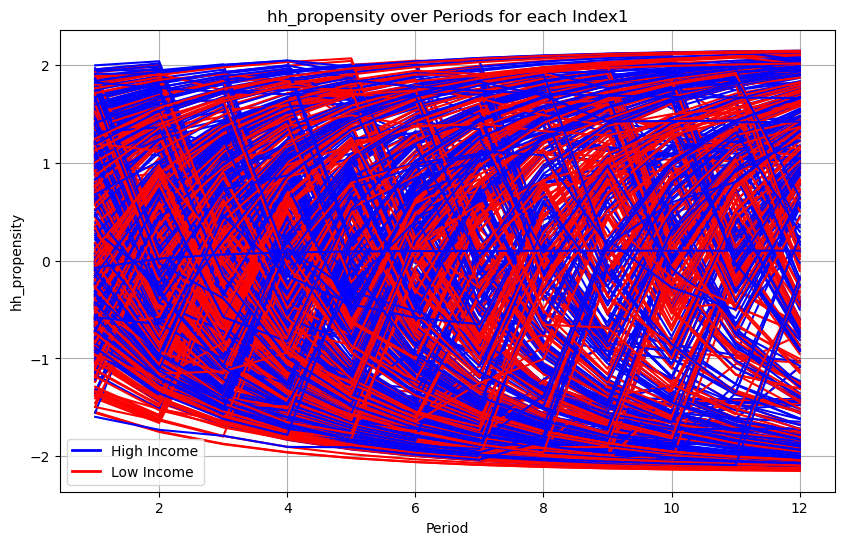

In [107]:
plt.figure(figsize=(10, 6))

for index1, group in df.groupby('index1'):

    color = 'blue' if group['high_income'].iloc[0] == 1 else 'red'
    plt.plot(group['period'], group['hh_propensity'], color=color)

legend_labels = {1: 'High Income', 0: 'Low Income'}
legend_handles = [plt.Line2D([0], [0], color='blue', lw=2, label=legend_labels[1]),
                  plt.Line2D([0], [0], color='red', lw=2, label=legend_labels[0])]

plt.legend(handles=legend_handles)

plt.title('hh_propensity over Periods for each Index1')
plt.xlabel('Period')
plt.ylabel('hh_propensity')
plt.grid(True)
plt.show()

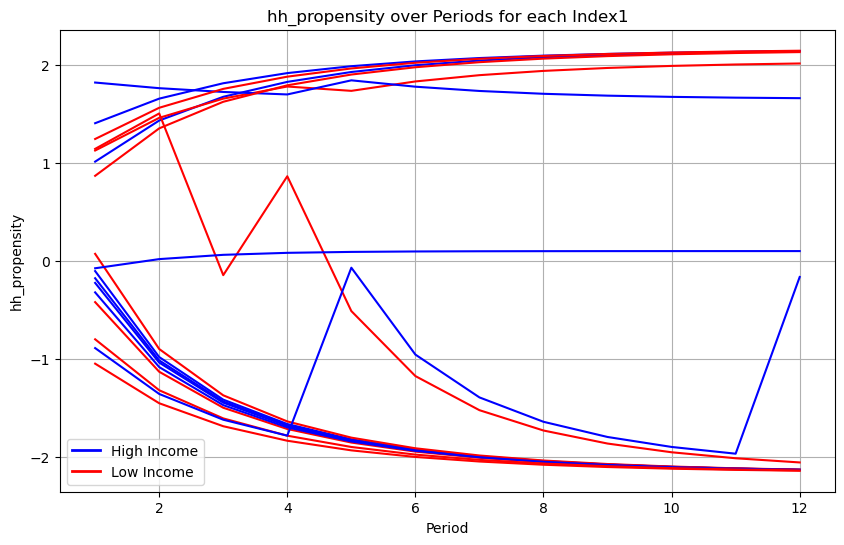

In [108]:
plt.figure(figsize=(10, 6))

for index1, group in df.groupby('index1'):
    if index1 < 10 or index1 > 955:
        color = 'blue' if group['high_income'].iloc[0] == 1 else 'red'
        plt.plot(group['period'], group['hh_propensity'], color=color)

legend_labels = {1: 'High Income', 0: 'Low Income'}
legend_handles = [plt.Line2D([0], [0], color='blue', lw=2, label=legend_labels[1]),
                  plt.Line2D([0], [0], color='red', lw=2, label=legend_labels[0])]

plt.legend(handles=legend_handles)

plt.title('hh_propensity over Periods for each Index1')
plt.xlabel('Period')
plt.ylabel('hh_propensity')
plt.grid(True)
plt.show()

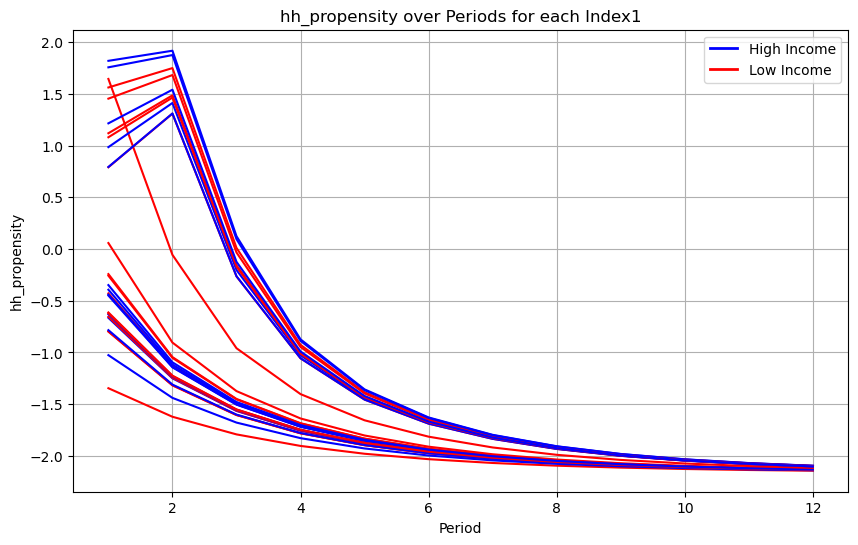

In [109]:
plt.figure(figsize=(10, 6))

for index1, group in df.groupby('index1'):
    if index1 > 10 and index1 < 40:
        color = 'blue' if group['high_income'].iloc[0] == 1 else 'red'
        plt.plot(group['period'], group['hh_propensity'], color=color)

legend_labels = {1: 'High Income', 0: 'Low Income'}
legend_handles = [plt.Line2D([0], [0], color='blue', lw=2, label=legend_labels[1]),
                  plt.Line2D([0], [0], color='red', lw=2, label=legend_labels[0])]

plt.legend(handles=legend_handles)

plt.title('hh_propensity over Periods for each Index1')
plt.xlabel('Period')
plt.ylabel('hh_propensity')
plt.grid(True)
plt.show()

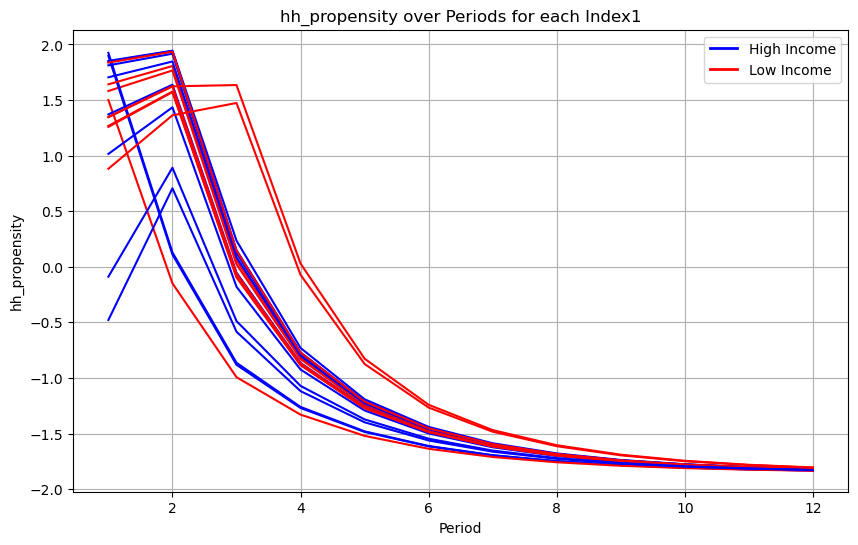

In [110]:
plt.figure(figsize=(10, 6))

for index1, group in df.groupby('index1'):
    if index1 > 100 and index1 < 120:
        color = 'blue' if group['high_income'].iloc[0] == 1 else 'red'
        plt.plot(group['period'], group['hh_propensity'], color=color)

legend_labels = {1: 'High Income', 0: 'Low Income'}
legend_handles = [plt.Line2D([0], [0], color='blue', lw=2, label=legend_labels[1]),
                  plt.Line2D([0], [0], color='red', lw=2, label=legend_labels[0])]

plt.legend(handles=legend_handles)

plt.title('hh_propensity over Periods for each Index1')
plt.xlabel('Period')
plt.ylabel('hh_propensity')
plt.grid(True)
plt.show()

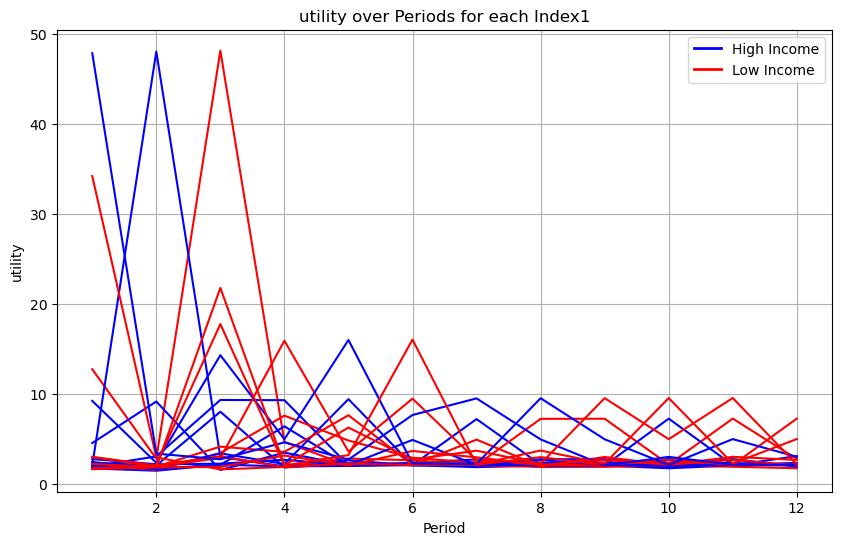

In [111]:
plt.figure(figsize=(10, 6))

for index1, group in df.groupby('index1'):
    if index1 > 100 and index1 < 120:
        color = 'blue' if group['high_income'].iloc[0] == 1 else 'red'
        plt.plot(group['period'], group['utility'], color=color)

legend_labels = {1: 'High Income', 0: 'Low Income'}
legend_handles = [plt.Line2D([0], [0], color='blue', lw=2, label=legend_labels[1]),
                  plt.Line2D([0], [0], color='red', lw=2, label=legend_labels[0])]

plt.legend(handles=legend_handles)

plt.title('utility over Periods for each Index1')
plt.xlabel('Period')
plt.ylabel('utility')
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

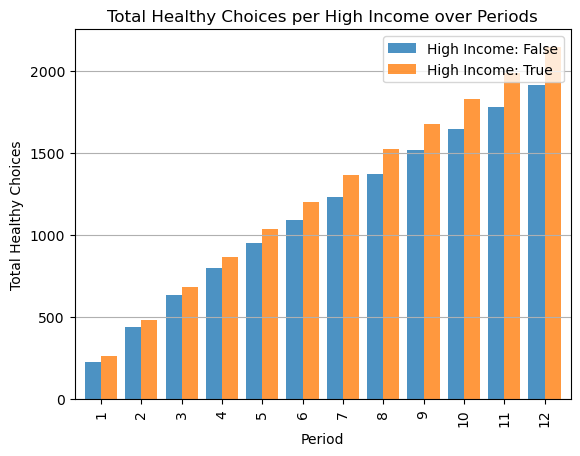

In [112]:
# Group by 'period' and sum the 'healthy_choice' column for both high income True and False
grouped_data = df.groupby(['period', 'high_income'])['healthy_choice'].sum().unstack()

# Plotting
plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', width=0.8, alpha=0.8)
plt.title('Total Healthy Choices per High Income over Periods')
plt.xlabel('Period')
plt.ylabel('Total Healthy Choices')
plt.legend(['High Income: False', 'High Income: True'], loc='upper right')
plt.grid(axis='y')
plt.show()

<Figure size 1200x600 with 0 Axes>

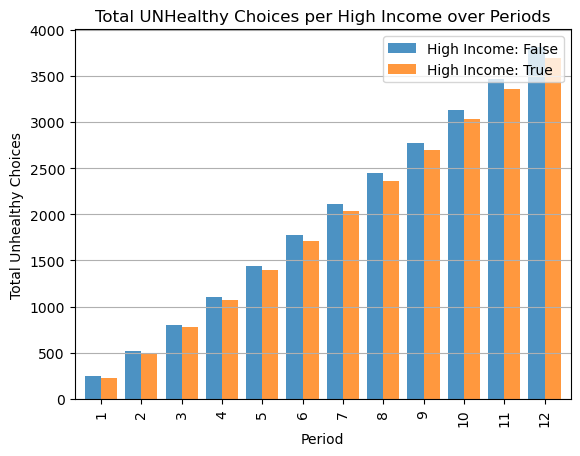

In [113]:
# Group by 'period' and sum the 'healthy_choice' column for both high income True and False
grouped_data = df.groupby(['period', 'high_income'])['unhealthy_choice'].sum().unstack()

# Plotting
plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', width=0.8, alpha=0.8)
plt.title('Total UNHealthy Choices per High Income over Periods')
plt.xlabel('Period')
plt.ylabel('Total Unhealthy Choices')
plt.legend(['High Income: False', 'High Income: True'], loc='upper right')
plt.grid(axis='y')
plt.show()

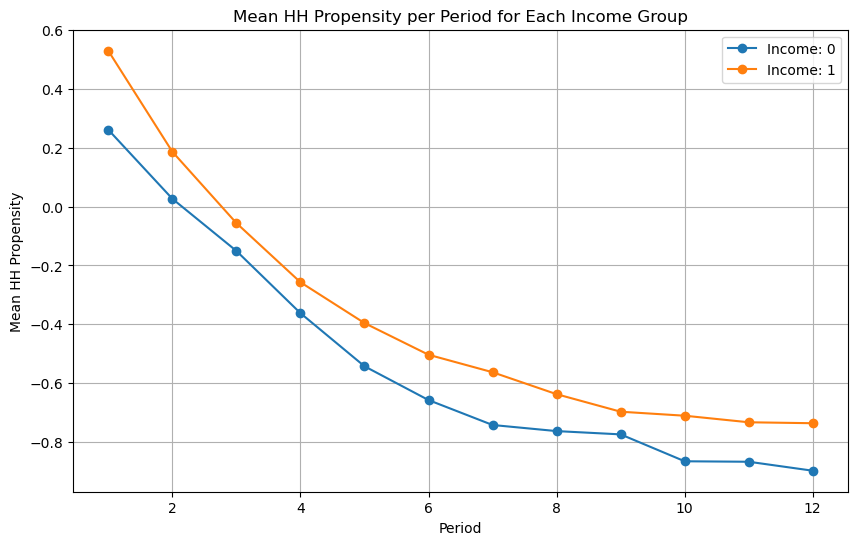

In [114]:
# Calculate means for 'hh_propensity' per period in each income group
mean_hh_propensity_income_group = df.groupby(['high_income', 'period'])['hh_propensity'].mean().unstack()

# Plotting
plt.figure(figsize=(10, 6))
for income_group in mean_hh_propensity_income_group.index:
    plt.plot(mean_hh_propensity_income_group.columns, mean_hh_propensity_income_group.loc[income_group], marker='o', linestyle='-', label=f'Income: {income_group}')

plt.title('Mean HH Propensity per Period for Each Income Group')
plt.xlabel('Period')
plt.ylabel('Mean HH Propensity')
plt.legend()
plt.grid(True)
plt.show()


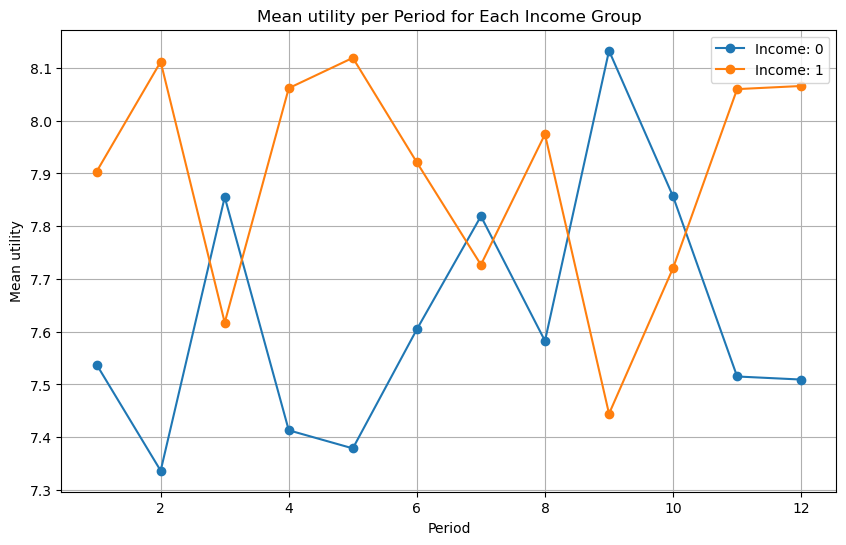

In [115]:

# Calculate means for 'hh_propensity' per period in each income group
mean_hh_propensity_income_group = df.groupby(['high_income', 'period'])['utility'].mean().unstack()

# Plotting
plt.figure(figsize=(10, 6))
for income_group in mean_hh_propensity_income_group.index:
    plt.plot(mean_hh_propensity_income_group.columns, mean_hh_propensity_income_group.loc[income_group], marker='o', linestyle='-', label=f'Income: {income_group}')

plt.title('Mean utility per Period for Each Income Group')
plt.xlabel('Period')
plt.ylabel('Mean utility')
plt.legend()
plt.grid(True)
plt.show()
